In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
x, y = make_classification(
    n_samples=1000,
    n_features=10,
    random_state=42,
)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
df_knn = []

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    acc_score = accuracy_score(y_pred, y_test)

    df_knn.append({
        'n_neighbors': k,
        'train_score': train_score,
        'test_score': test_score,
        'accuracy_score': acc_score
    })
df_knn = pd.DataFrame(df_knn)

In [5]:
df_knn

,n_neighbors,train_score,test_score,accuracy_score
0,1,1.00000,0.800,0.800
1,3,0.90875,0.790,0.790
2,5,0.89750,0.800,0.800
3,7,0.88875,0.815,0.815
4,9,0.88625,0.845,0.845


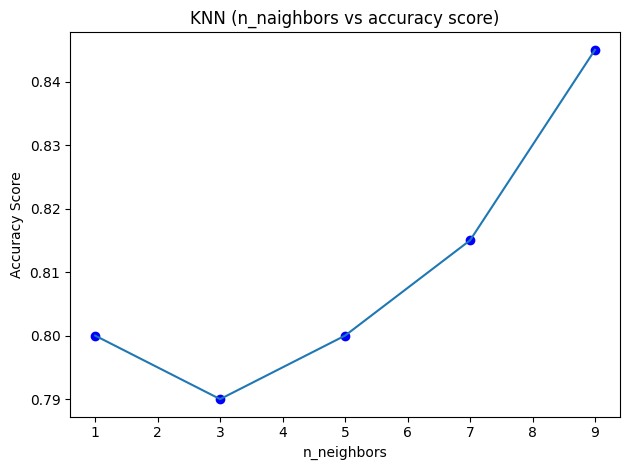

In [6]:
plt.scatter(df_knn['n_neighbors'], df_knn['accuracy_score'], c='blue')
plt.plot(df_knn['n_neighbors'], df_knn['accuracy_score'])
plt.title("KNN (n_naighbors vs accuracy score)")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

In [7]:
df_log = []

for i in [1000, 2000, 3000]:
    log_model = LogisticRegression(max_iter=i,random_state=42)
    log_model.fit(x_train, y_train)
    y_pred = log_model.predict(x_test)
    train_score = log_model.score(x_train, y_train)
    test_score = log_model.score(x_test, y_test)
    acc_score = accuracy_score(y_pred, y_test)

    df_log.append({
        "Iteration" : i,
        'train_score': train_score,
        'test_score': test_score,
        'accuracy_score': acc_score
    })
df_log = pd.DataFrame(df_log)

In [8]:
df_log

,Iteration,train_score,test_score,accuracy_score
0,1000,0.87,0.83,0.83
1,2000,0.87,0.83,0.83
2,3000,0.87,0.83,0.83


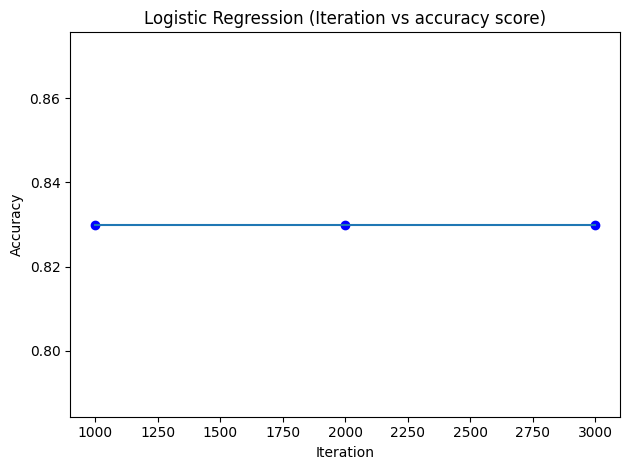

In [9]:
plt.scatter(df_log['Iteration'], df_log['accuracy_score'], c='blue')
plt.plot(df_log['Iteration'], df_log['accuracy_score'])
plt.title("Logistic Regression (Iteration vs accuracy score)")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [10]:
df_rf = []
n = [100, 200, 500]
depth = [None,5,10,20]
min_samp_split = [2,5,10]

for n in n:
    for d in depth:
        for m in min_samp_split:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=m, random_state=42)
            rf.fit(x_train, y_train)
            y_pred = rf.predict(x_test)
            train_score = rf.score(x_train, y_train)
            test_score = rf.score(x_test, y_test)
            acc_score = accuracy_score(y_pred, y_test)

            df_rf.append({
                'n_estimators': n,
                'max_depth': d,
                'min_samples_split': m,
                'train_score': train_score,
                'test_score': test_score,
                'accuracy_score': acc_score
            })
df_rf = pd.DataFrame(df_rf)

In [11]:
df_rf.head(10)

,n_estimators,max_depth,min_samples_split,train_score,test_score,accuracy_score
0,100,NaN,2,1.00000,0.880,0.880
1,100,NaN,5,0.99500,0.885,0.885
2,100,NaN,10,0.97000,0.885,0.885
3,100,5.0,2,0.93000,0.865,0.865
4,100,5.0,5,0.93250,0.865,0.865
5,100,5.0,10,0.93125,0.865,0.865
6,100,10.0,2,0.99750,0.885,0.885
7,100,10.0,5,0.98750,0.870,0.870
8,100,10.0,10,0.96875,0.880,0.880
9,100,20.0,2,1.00000,0.880,0.880


In [12]:
df_rf.sort_values(by=['accuracy_score','train_score','test_score'], ascending=False).head(5)

,n_estimators,max_depth,min_samples_split,train_score,test_score,accuracy_score
6,100,10.0,2,0.9975,0.885,0.885
13,200,NaN,5,0.9975,0.885,0.885
22,200,20.0,5,0.9975,0.885,0.885
1,100,NaN,5,0.9950,0.885,0.885
10,100,20.0,5,0.9950,0.885,0.885


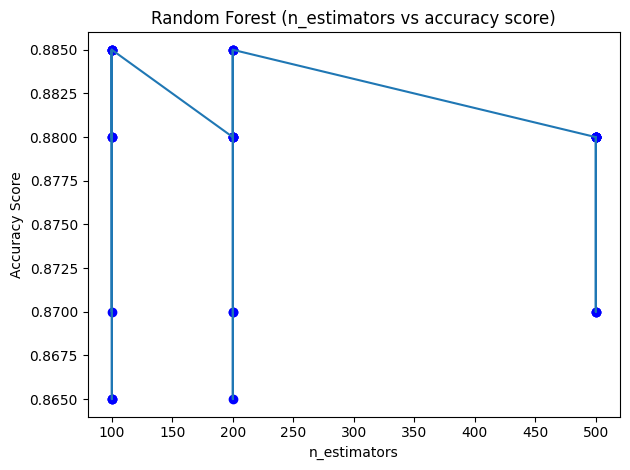

In [13]:
plt.scatter(df_rf['n_estimators'], df_rf['accuracy_score'], c='blue')
plt.plot(df_rf['n_estimators'], df_rf['accuracy_score'])
plt.title("Random Forest (n_estimators vs accuracy score)")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

In [14]:
df_dt = []

for depth in [1, 2, 3, 4, 5]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)

    y_pred = dt.predict(x_test)
    train_score = dt.score(x_train, y_train)
    test_score = dt.score(x_test, y_test)
    acc = accuracy_score(y_test, y_pred)

    df_dt.append({
        "max_depth": depth,
        "train_score": train_score,
        "test_score": test_score,
        "accuracy_score": acc
    })
df_dt = pd.DataFrame(df_dt)

In [15]:
df_dt

,max_depth,train_score,test_score,accuracy_score
0,1,0.88250,0.840,0.840
1,2,0.88625,0.850,0.850
2,3,0.89500,0.855,0.855
3,4,0.93000,0.870,0.870
4,5,0.95375,0.855,0.855


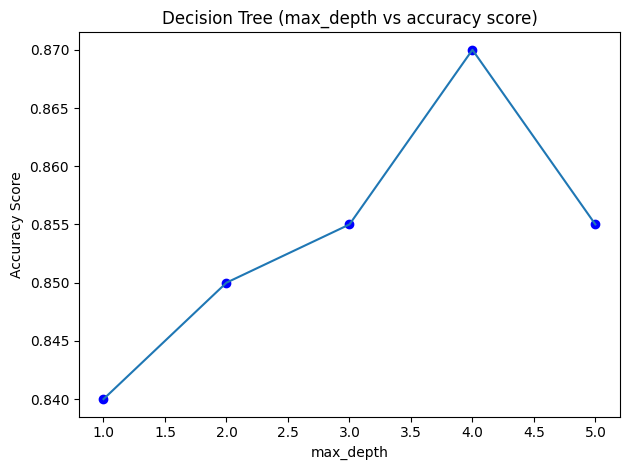

In [16]:
plt.scatter(df_dt['max_depth'], df_dt['accuracy_score'], c='blue')
plt.plot(df_dt['max_depth'], df_dt['accuracy_score'])
plt.title("Decision Tree (max_depth vs accuracy score)")
plt.xlabel('max_depth')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()